# Arboles de decisión (CindyMoreno)

In [6]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [29]:
data = pd.read_csv("../Documents/Analisis de datos Fase 2/Arboles de Decisión/wine.data")
data= data.rename( columns={'1':'clase', '14.23': 'Alcohol', '1.71': 'Acido Malico','2.43': 'Ceniza', '15.6': 'Alcalinidad de la ceniza'
    ,'127': 'magnesio','2.8': 'Fenoles totales','3.06': 'Flavonoides', '.28': 'Fenoles no flavonoides', '2.29': 'Proantocianinas',
     '5.64': 'Intensidad olor' , '1.04': 'Tono','3.92': 'OD280/0D315',  '1065': 'Prolina'
                          })
data.head()

,clase,Alcohol,Acido Malico,Ceniza,Alcalinidad de la ceniza,magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad olor,Tono,OD280/0D315,Prolina
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [30]:
data.shape

(177, 14)

In [31]:
data.describe()


,clase,Alcohol,Acido Malico,Ceniza,Alcalinidad de la ceniza,magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad olor,Tono,OD280/0D315,Prolina
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([58.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

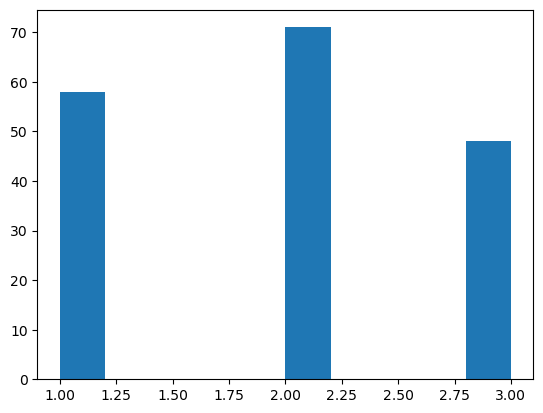

In [32]:
plt.hist(data.clase)

In [33]:
predictors_col = ["Ceniza","magnesio","Intensidad olor","Prolina"]
target_col = ["clase"]

In [34]:
predictors = data[predictors_col]
target = data[target_col]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [36]:
fig=plt.figure(figsize=(50,50))
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)

<Figure size 5000x5000 with 0 Axes>

[Text(0.390625, 0.9375, 'x[2] <= 3.82\ngini = 0.659\nsamples = 141\nvalue = [46, 56, 39]'),
 Text(0.1875, 0.8125, 'x[3] <= 1002.5\ngini = 0.113\nsamples = 50\nvalue = [3, 47, 0]'),
 Text(0.125, 0.6875, 'x[0] <= 3.07\ngini = 0.041\nsamples = 48\nvalue = [1, 47, 0]'),
 Text(0.0625, 0.5625, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.1875, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.25, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.59375, 0.8125, 'x[3] <= 882.5\ngini = 0.583\nsamples = 91\nvalue = [43, 9, 39]'),
 Text(0.53125, 0.6875, 'x[3] <= 517.5\ngini = 0.421\nsamples = 53\nvalue = [5, 9, 39]'),
 Text(0.3125, 0.5625, 'x[2] <= 6.55\ngini = 0.444\nsamples = 12\nvalue = [0, 8, 4]'),
 Text(0.25, 0.4375, 'x[3] <= 512.5\ngini = 0.198\nsamples = 9\nvalue = [0, 8, 1]'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.3125, 0.3125, 'x[1] <= 90.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.25, 0.1875, 'gini

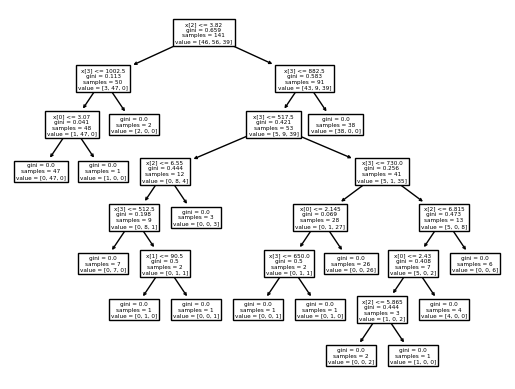

In [37]:
plot_tree(arbol)

In [38]:
predicciones = arbol.predict(X_test)

In [41]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])


Predicciones,1,2,3
Actual,,,
1,9,1,2
2,0,13,2
3,0,2,7


In [42]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.8055555555555556